In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'data_cleaned.csv')
data.head()

Survived   Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  22.0   7.2500         0         0         1           0   
1         1  38.0  71.2833         1         0         0           1   
2         1  26.0   7.9250         0         0         1           1   
3         1  35.0  53.1000         1         0         0           1   
4         0  35.0   8.0500         0         0         1           0   

   Sex_male  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1        0        1  ...        1        0        0        0   
1         0        0        1  ...        1        0        0        0   
2         0        1        0  ...        1        0        0        0   
3         0        0        1  ...        1        0        0        0   
4         1        1        0  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        0        0           0           0           1  
1        0        0        0           1           0           0  
2        0        0        0           0           0           1  
3        0        0        0           0           0           1  
4        0        0        0           0           0           1  

[5 rows x 25 columns]

In [3]:
#separating the independent and dependent variables
x = data.drop(['Survived'], axis =1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [4]:
x

Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0    22.000000   7.2500         0         0         1           0         1   
1    38.000000  71.2833         1         0         0           1         0   
2    26.000000   7.9250         0         0         1           1         0   
3    35.000000  53.1000         1         0         0           1         0   
4    35.000000   8.0500         0         0         1           0         1   
..         ...      ...       ...       ...       ...         ...       ...   
886  27.000000  13.0000         0         1         0           0         1   
887  19.000000  30.0000         1         0         0           1         0   
888  29.699118  23.4500         0         0         1           1         0   
889  26.000000  30.0000         1         0         0           0         1   
890  32.000000   7.7500         0         0         1           0         1   

     SibSp_0  SibSp_1  SibSp_2  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0          0        1        0  ...        1        0        0        0   
1          0        1        0  ...        1        0        0        0   
2          1        0        0  ...        1        0        0        0   
3          0        1        0  ...        1        0        0        0   
4          1        0        0  ...        1        0        0        0   
..       ...      ...      ...  ...      ...      ...      ...      ...   
886        1        0        0  ...        1        0        0        0   
887        1        0        0  ...        1        0        0        0   
888        0        1        0  ...        0        0        1        0   
889        1        0        0  ...        1        0        0        0   
890        1        0        0  ...        1        0        0        0   

     Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0          0        0        0           0           0           1  
1          0        0        0           1           0           0  
2          0        0        0           0           0           1  
3          0        0        0           0           0           1  
4          0        0        0           0           0           1  
..       ...      ...      ...         ...         ...         ...  
886        0        0        0           0           0           1  
887        0        0        0           0           0           1  
888        0        0        0           0           0           1  
889        0        0        0           1           0           0  
890        0        0        0           0           1           0  

[891 rows x 24 columns]

In [5]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
#Importing the train test split function
from sklearn.model_selection import train_test_split

In [7]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 56, stratify = y)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [10]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns = cols)
train_x_scaled.head()

Age      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0  0.497361  0.018494       0.0       0.0       1.0         1.0       0.0   
1  0.484795  0.061045       0.0       0.0       1.0         0.0       1.0   
2  0.367921  0.027058       0.0       1.0       0.0         0.0       1.0   
3  0.321438  0.050749       0.0       1.0       0.0         1.0       0.0   
4  0.308872  0.014932       0.0       0.0       1.0         0.0       1.0   

   SibSp_0  SibSp_1  SibSp_2  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0      0.0      1.0      0.0  ...      1.0      0.0      0.0      0.0   
1      0.0      1.0      0.0  ...      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   
3      0.0      1.0      0.0  ...      0.0      1.0      0.0      0.0   
4      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0      0.0      0.0      0.0         0.0         0.0         1.0  
1      0.0      1.0      0.0         0.0         0.0         1.0  
2      0.0      0.0      0.0         1.0         0.0         0.0  
3      0.0      0.0      0.0         0.0         0.0         1.0  
4      0.0      0.0      0.0         0.0         0.0         1.0  

[5 rows x 24 columns]

In [11]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns = cols)
test_x_scaled.head()

Age      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0  0.367921  0.015127       0.0       0.0       1.0         0.0       1.0   
1  0.673285  0.050749       0.0       1.0       0.0         0.0       1.0   
2  0.233476  0.050749       0.0       1.0       0.0         1.0       0.0   
3  0.233476  0.028302       0.0       0.0       1.0         0.0       1.0   
4  0.597889  0.051822       1.0       0.0       0.0         0.0       1.0   

   SibSp_0  SibSp_1  SibSp_2  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   
1      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   
2      0.0      1.0      0.0  ...      1.0      0.0      0.0      0.0   
3      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   
4      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0      0.0      0.0      0.0         0.0         1.0         0.0  
1      0.0      0.0      0.0         0.0         0.0         1.0  
2      0.0      0.0      0.0         0.0         0.0         1.0  
3      0.0      0.0      0.0         0.0         0.0         1.0  
4      0.0      0.0      0.0         0.0         0.0         1.0  

[5 rows x 24 columns]

In [12]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [13]:
logreg = LogReg()
#fitting the model
logreg.fit(train_x, train_y)

LogisticRegression()

In [14]:
#Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [15]:
#Calculating f1-score
k = f1_score(train_predict, train_y)
print("Training f1_score",k)

Training f1_score 0.7636363636363636


In [18]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.7100591715976331


In [19]:
test_predict

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [ ]:
-------------------------------------------------------------------------------

In [20]:
train_predict_prob = logreg.predict_proba(train_x)
train_predict_prob

array([[0.5249502 , 0.4750498 ],
       [0.94518999, 0.05481001],
       [0.73265067, 0.26734933],
       ...,
       [0.91473093, 0.08526907],
       [0.45777196, 0.54222804],
       [0.75735677, 0.24264323]])

In [21]:
train_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [22]:
new_train_predict_prob = train_predict_prob[:,1]
new_train_predict_prob

array([0.4750498 , 0.05481001, 0.26734933, 0.87110075, 0.10275728,
       0.64970717, 0.14346641, 0.51583564, 0.90417333, 0.56134356,
       0.127336  , 0.10258917, 0.88316657, 0.10681475, 0.75886127,
       0.79246017, 0.14149939, 0.97162486, 0.14520208, 0.11486056,
       0.69196127, 0.82628419, 0.59460382, 0.06303996, 0.71492214,
       0.13994547, 0.06092071, 0.12008042, 0.93088623, 0.02954268,
       0.86765197, 0.11555297, 0.34628692, 0.36877767, 0.81999591,
       0.14044342, 0.10380854, 0.74126654, 0.12492301, 0.09144448,
       0.12010419, 0.0995281 , 0.94747494, 0.29624985, 0.44261639,
       0.08183291, 0.93390683, 0.95658783, 0.11548063, 0.96116511,
       0.08530359, 0.12480938, 0.64354172, 0.1280667 , 0.1163187 ,
       0.35092256, 0.11125521, 0.9508126 , 0.11548063, 0.10380854,
       0.91518454, 0.74629398, 0.82823087, 0.45546194, 0.34727574,
       0.63349628, 0.07467105, 0.37929207, 0.10380854, 0.89685857,
       0.14523229, 0.09255062, 0.36967074, 0.23183638, 0.11192

In [23]:
for i in range(0, len(new_train_predict_prob)):
    if new_train_predict_prob[i]>0.2:
        new_train_predict_prob[i] = 1
    else:
        new_train_predict_prob[i] = 0
k = f1_score(new_train_predict_prob, train_y)
print("accuracy for training",k)

accuracy for training 0.7145135566188199


In [24]:
new_train_predict_prob

array([1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1.

In [25]:
k = f1_score(new_train_predict_prob, train_y)
print("accuracy for training", k)

accuracy for training 0.7145135566188199


In [26]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_y, test_predict)
print(cf)

[[114  23]
 [ 26  60]]


In [27]:
from sklearn.metrics import classification_report as rep
print(rep(test_y, test_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       137
           1       0.72      0.70      0.71        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



<function matplotlib.pyplot.show(close=None, block=None)>

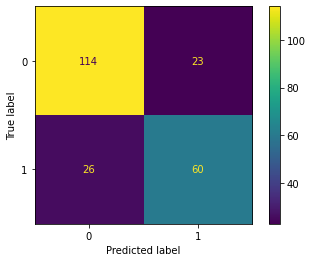

In [28]:
from sklearn import metrics
metrics.plot_confusion_matrix(logreg, test_x, test_y)
plt.show

In [29]:
from sklearn import metrics
auc_score = metrics.roc_auc_score(test_y , test_predict)
print(f"scikit's ROC-AUC score of LogisticRegression model is{auc_score: .4f}")

scikit's ROC-AUC score of LogisticRegression model is 0.7649


In [30]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_predict)

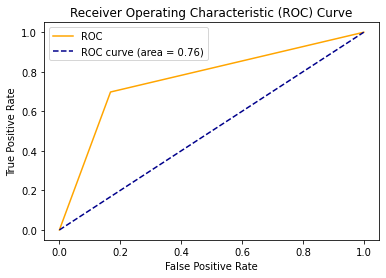

In [31]:
plt.plot(fpr, tpr, color = 'orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import classification_report

print(classification_report(test_y,test_predict))



# Confusion Matrix
conf_mat = metrics.confusion_matrix(test_y,test_predict)
conf_mat

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print(F1_Score)

# Area Under Curve
auc = metrics.roc_auc_score(test_y,test_predict)
auc

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       137
           1       0.72      0.70      0.71        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

0.8231046931407942


0.7648956034629095

In [33]:
for i in range(0, len(new_train_predict_prob)):
    if new_train_predict_prob[i] > 0.2:
        new_train_predict_prob[i] =1
    else:
        new_train_predict_prob[i] =0
k = f1_score(new_train_predict_prob, train_y)
print("Accuracy for training", k)

Accuracy for training 0.7145135566188199


In [34]:
logreg.coef_

array([[-4.37897052e-02,  8.85047738e-04,  1.21578413e+00,
         9.79206617e-02, -1.04370158e+00,  1.44835722e+00,
        -1.17835401e+00,  7.72115277e-01,  8.67707344e-01,
         2.43289168e-01, -6.04161894e-01, -4.23568804e-01,
        -2.24819885e-01, -3.60557993e-01,  1.90442571e-01,
         4.31749361e-01, -1.49056495e-01,  1.26052152e-01,
        -2.09407114e-01,  6.44076960e-03, -1.26218031e-01,
         4.99204090e-02,  3.87658598e-01, -1.67575795e-01]])

Text(0.5, 1.0, 'Coefficient plot')

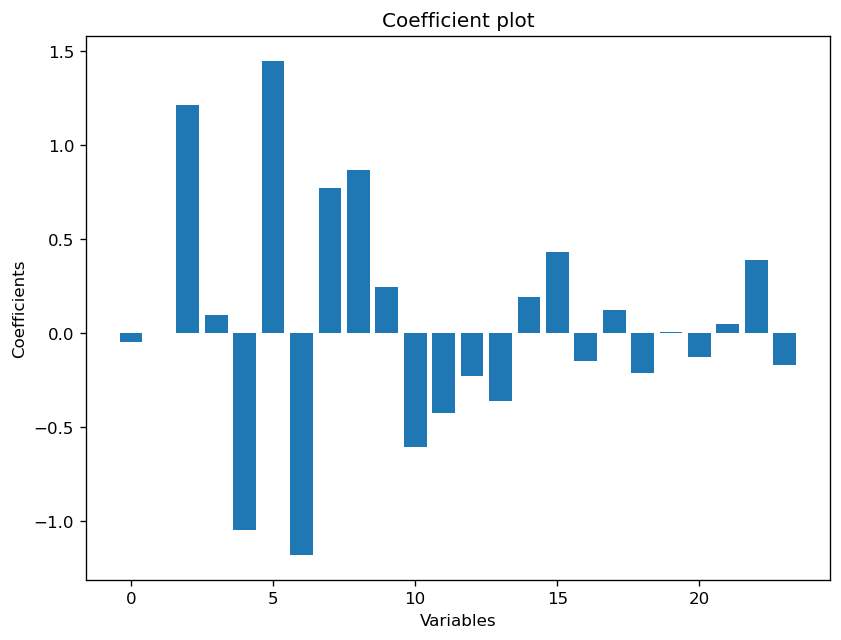

In [36]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [ ]:
Coefficients = pd.DataFrame({
    'Variable' : train_x.columns,
    'Coeffic'
})